# Binomial Option Trees.

## Introduction.

The Cox, Ross and Rubinstein (CRR) model is a binomial pricing option model used for pricing options and other derivatives. It is particularly useful for valuing American and exotic options based on a discrete time frame. In this notebook, I will consider both American and European options.

## Assumptions and Notations.

### Assumptions. 

This model assumes the following:
* No trading costs/taxes.
* Constant risk free rate throughout the period of consideration.
* No minimum/maximum requirements for trade execution.  
* The price can vary only two ways: Up or Down.
* No arbitrage.

### Notations.

I have used the following notations:
* $s_{0}$ = Price of the underlying derivative at $t$ = 0.
* $vol$ = Volatility of the underlying derivative.
* $r_f$ = Risk-free rate.
* $x$ = Strike price of the underlying derivative.
* $div$ = Dividend yield paid continuously.
* $time$ = Time to expiry of the option.
* $tree$ = Number of trees.

Therefore:
$$
\begin{aligned}
s_0e^{({rf}-{div})\Delta t}&=qs_0u+(1-q)s_0d \\ \\
where \\
u&=e^{\sigma \sqrt{\Delta t}} \\
d&=\frac{1}{u} \\
\Delta t&= \frac{time}{tree} \\
q&=\frac{e^{\sigma \sqrt{\Delta t}}-d}{u-d}
\end{aligned}
$$

## European Options.

European options are options that can only be exercised at the time of expiry. As a demonstration, we are going to use the following input parameters:

* $s_{0}$ = 144
* vol = 0.315573
* $r_f$ = 0.19062
* $x$ = 144
* $div$ = 0
* $time$ = 1.5
* $tree$ = 3

### Displaying the pricing tree.

In [1]:
import BinomialTrees as bin #importing 

derivative=bin.European(144,0.315573,0.19062,144,0,1.5,3) #initialization
print(derivative.price()) # Display pricing tree.

[[144.     180.     225.0001 281.2502]
 [  0.     115.2    144.     180.    ]
 [  0.       0.     144.     180.    ]
 [  0.       0.      92.16   115.2   ]
 [  0.       0.       0.     180.    ]
 [  0.       0.       0.     115.2   ]
 [  0.       0.       0.     115.2   ]
 [  0.       0.       0.      73.7279]]


### Calculating the value of the call.

In [2]:
import BinomialTrees as bin #importing 

derivative=bin.European(144,0.315573,0.19062,144,0,1.5,3) #initialization
derivative.call() # Calculate call value


Call option value: 42.57
Input parameters:
s0=144.0
vol=0.315573
rf=0.19062
x=144.0
div=0.0
time=1.5
tree=3


### Displaying the call option tree.

In [3]:
import BinomialTrees as bin #importing 

derivative=bin.European(144,0.315573,0.19062,144,0,1.5,3) #initialization
print(derivative.call_show()) # Display call option tree

[[ 42.5745  63.6364  94.091  137.2502]
 [  0.      13.2231  21.8182  36.    ]
 [  0.       0.      21.8182  36.    ]
 [  0.       0.       0.       0.    ]
 [  0.       0.       0.      36.    ]
 [  0.       0.       0.       0.    ]
 [  0.       0.       0.       0.    ]
 [  0.       0.       0.       0.    ]]


### Calculating the value of the put.

In [4]:
import BinomialTrees as bin #importing 

derivative=bin.European(144,0.315573,0.19062,144,0,1.5,3) #initialization
derivative.put() # Calculate put value

Put option value: 6.76
Input parameters:
s0=144.0
vol=0.315573
rf=0.19062
x=144.0
div=0.0
time=1.5
tree=3


### Displaying the put option tree.

In [5]:
import BinomialTrees as bin #importing 

derivative=bin.European(144,0.315573,0.19062,144,0,1.5,3) #initialization
print(derivative.put_show()) # Display put option tree

[[ 6.7639  2.6446  0.      0.    ]
 [ 0.     17.0315  8.7273  0.    ]
 [ 0.      0.      8.7273  0.    ]
 [ 0.      0.     38.7492 28.8   ]
 [ 0.      0.      0.      0.    ]
 [ 0.      0.      0.     28.8   ]
 [ 0.      0.      0.     28.8   ]
 [ 0.      0.      0.     70.2721]]


In [6]:
import BinomialTrees as bin #importing 

derivative=bin.European(144,0.315573,0.19062,144,0,1.5,3) #initialization
derivative.put() # Calculate put value

Put option value: 6.76
Input parameters:
s0=144.0
vol=0.315573
rf=0.19062
x=144.0
div=0.0
time=1.5
tree=3


### CRR model convergence to Black-Scholes-Merton model.

As the time step becomes smaller, the CRR model converges to the Black-Scholes-Merton model. However, depending on the input variables, the convergence is not always uniform and it oscillates.

In [7]:
import BinomialTrees as bin #importing 
import numpy as np
import matplotlib.pyplot as plt #Plotting package
from scipy.stats import norm

def  BS(s0,vol,rf,x,div,time): #Calculating the theoretical call price via B-S Model.
    
    d1=((np.log(s0/x))+(rf-div+0.5*(vol**2))*time)/(vol*np.sqrt(time))
    d2= d1-(vol*np.sqrt(time))
    derivative=s0*np.exp(-div*time)*norm.cdf(d1)-x*np.exp(-rf*time)*norm.cdf(d2)
    return(derivative)

derivative=bin.European(144,0.315573,0.19062,144,0,1.5,3) #initialization of CRR model.
Theoretical_price=BS(144,0.315573,0.19062,144,0,1.5)
    
print(f'The Theoretical call value is: {Theoretical_price}\nThe CRR call value is: {derivative.call_show()[0,0]}')


The Theoretical call value is: 42.181812997239916
The CRR call value is: 42.57448713846103


As seen above the theoretical value is approximately equal to the CRR value when using 3 trees. It can also be demonstrated, as the time step changes, it oscillates.

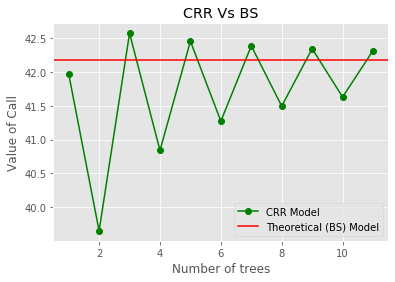

In [8]:
n_call=[]
for i in range(1,12):
    derivative=bin.European(144,0.315573,0.19062,144,0,1.5,i) #initialization of CRR model.
    n_call.append(derivative.call_show()[0,0])
plt.style.use('ggplot')
plt.plot(list(range(1,i+1)),n_call,marker="o",color="green",label="CRR Model")
plt.ylabel("Value of Call")
plt.xlabel("Number of trees")
plt.title("CRR Vs BS")
plt.axhline(y=Theoretical_price,color='red',linestyle='-',label="Theoretical (BS) Model")

plt.legend()


## American Options.

American options are options that can be exercised at any time prior to expiry. As a demonstration, we are going to use the following input parameters:

* $s_{0}$ = 144
* $vol$ = 0.315573
* $r_f$ = 0.19062
* $x$ = 144
* $div$ = 0.141235
* $time$ = 1.5
* $tree$ = 3

### Displaying the pricing tree.

In [9]:
import BinomialTrees as bin #importing 

derivative=bin.American(144,0.315573,0.19062,144,0.141235,1.5,3) #initialization
print(derivative.price()) # Display pricing tree.

[[144.     180.     225.0001 281.2502]
 [  0.     115.2    144.     180.    ]
 [  0.       0.     144.     180.    ]
 [  0.       0.      92.16   115.2   ]
 [  0.       0.       0.     180.    ]
 [  0.       0.       0.     115.2   ]
 [  0.       0.       0.     115.2   ]
 [  0.       0.       0.      73.7279]]


### Calculating the value of the call.

In [10]:
import BinomialTrees as bin #importing 

derivative=bin.American(144,0.315573,0.19062,144,0.141235,1.5,3) #initialization
derivative.call() # Calculate call value

Call option value: 23.50
Input parameters:
s0=144.0
vol=0.315573
rf=0.19062
x=144.0
div=0.141235
time=1.5
tree=3


### Displaying the call option tree.

In [11]:
import BinomialTrees as bin #importing 

derivative=bin.American(144,0.315573,0.19062,144,0.141235,1.5,3) #initialization
derivative.call_show() # Display call option tree

array([[ 23.4974,  44.2562,  81.0001, 137.2502],
       [  0.    ,   7.438 ,  16.3636,  36.    ],
       [  0.    ,   0.    ,  16.3636,  36.    ],
       [  0.    ,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ,  36.    ],
       [  0.    ,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ,   0.    ]])

### Calculating the value of the put.

In [12]:
import BinomialTrees as bin #importing 

derivative=bin.American(144,0.315573,0.19062,144,0.141235,1.5,3) #initialization
derivative.put() # Calculate put value

Put option value: 16.12
Input parameters:
s0=144.0
vol=0.315573
rf=0.19062
x=144.0
div=0.141235
time=1.5
tree=3


### Displaying the put option tree.

In [13]:
import BinomialTrees as bin #importing 

derivative=bin.American(144,0.315573,0.19062,144,0.141235,1.5,3) #initialization
print(derivative.put_show()) # Display put option tree

[[16.1203  5.9504  0.      0.    ]
 [ 0.     29.5141 13.0909  0.    ]
 [ 0.      0.     13.0909  0.    ]
 [ 0.      0.     51.84   28.8   ]
 [ 0.      0.      0.      0.    ]
 [ 0.      0.      0.     28.8   ]
 [ 0.      0.      0.     28.8   ]
 [ 0.      0.      0.     70.2721]]
